# Import Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

# Code

In [4]:
df = pd.read_csv(r"C:\Users\Harsh mishra\Desktop\solarFarm\data\solar+population.csv")
df.head()

,Sl No,State,Population,Rural,Urban,Area,Density (per km2),Total Solar Area (km2),Total Solar Farm Count,Percentage
0,1,Uttar Pradesh,199812341,155111022,44470455,240928,828,6.0,21.0,1.050986e-07
1,2,Maharashtra,112374333,61545441,50827531,307713,365,51.0,105.0,9.343771e-07
2,3,Bihar,104099452,92075028,11729609,94163,1102,0.0,0.0,0.000000e+00
3,4,West Bengal,91276115,62213676,29134060,88752,1030,4.0,14.0,1.533808e-07
4,5,Madhya Pradesh,72626809,52537899,20059666,308245,236,54.0,59.0,8.123722e-07


In [5]:
df = df.drop(df.index[-1])
df.tail()

,Sl No,State,Population,Rural,Urban,Area,Density (per km2),Total Solar Area (km2),Total Solar Farm Count,Percentage
31,32,Sikkim,610577,455962,151726,7096,86,0.0,0.0,0.0
32,33,Andaman and Nicobar Islands (UT),380581,244411,135533,8249,46,0.0,0.0,0.0
33,34,Dadra and Nagar Haveli (UT),343709,183024,159829,491,698,0.0,0.0,0.0
34,35,Daman and Diu (UT),243247,60331,182580,112,2169,0.0,0.0,0.0
35,36,Lakshadweep (UT),64473,14121,50308,32,2013,0.0,0.0,0.0


In [6]:
sf = df[df['Total Solar Farm Count'] != 0]
sf.tail()

,Sl No,State,Population,Rural,Urban,Area,Density (per km2),Total Solar Area (km2),Total Solar Farm Count,Percentage
16,17,Chhattisgarh,25545198,19603658,5936538,135191,189,4.0,8.0,3.131704e-07
17,18,Haryana,25351462,16531493,8821588,44212,573,3.0,22.0,8.678001e-07
20,21,Uttarakhand,10086292,7025583,3091169,53483,189,27.0,56.0,5.552090e-06
21,22,Himachal Pradesh,6864602,6167805,688704,55673,123,1.0,6.0,8.740492e-07
22,23,Tripura,3673917,2710051,960981,10486,350,0.0,1.0,2.721891e-07


## State vs Population

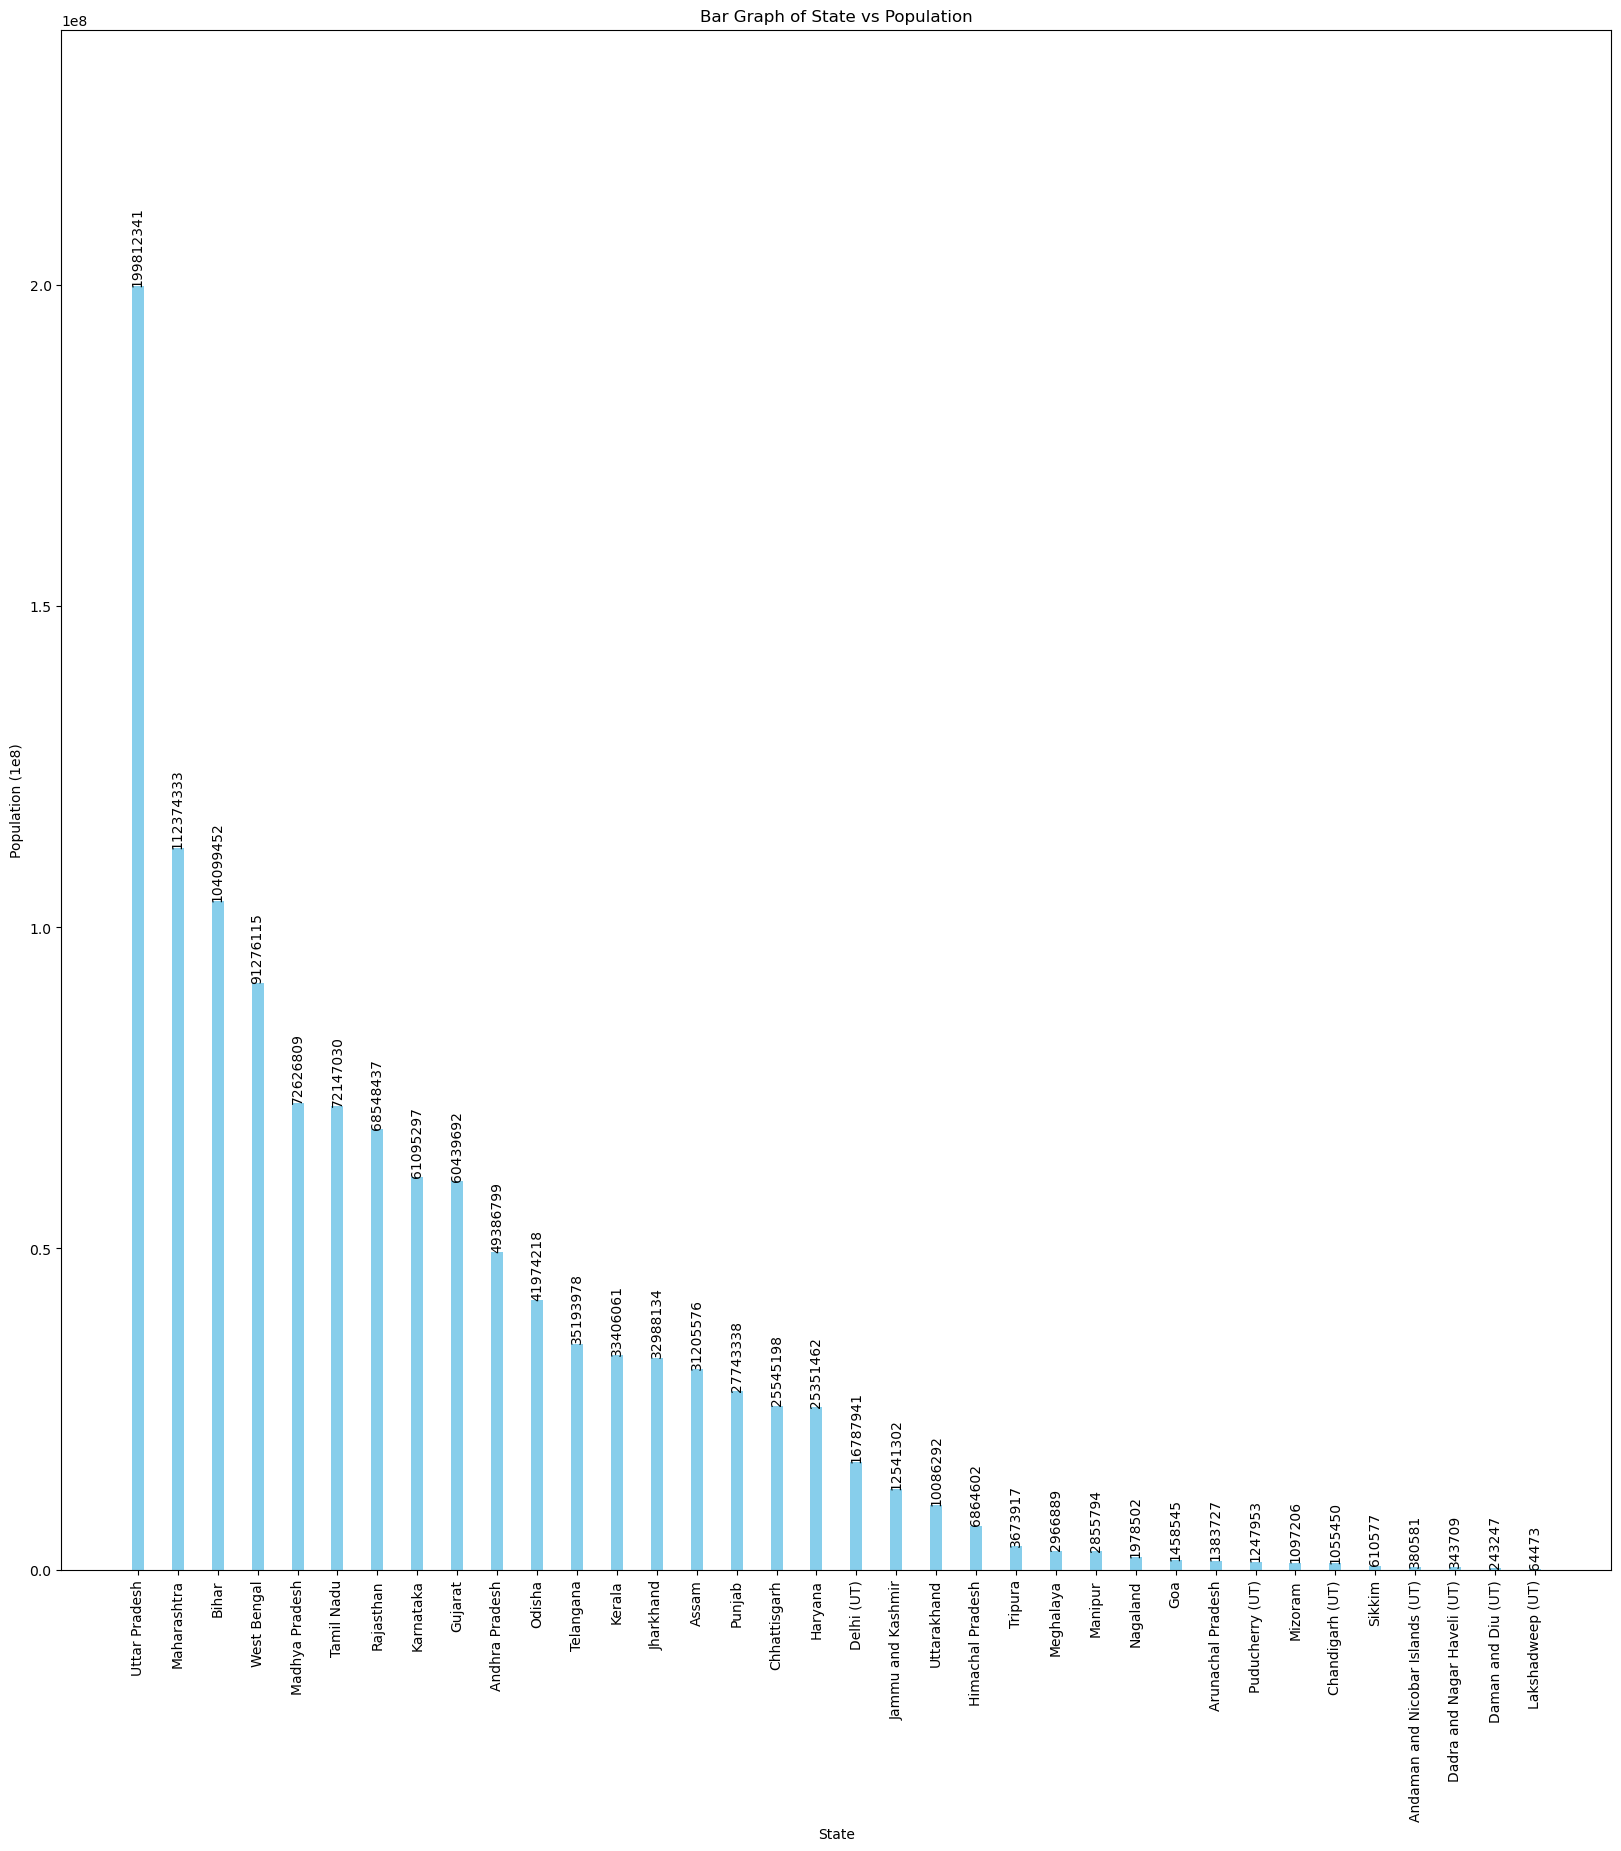

In [7]:
positions = np.arange(len(df)) * 2
plt.figure(figsize=(20,20))  # Adjust the figure size as needed
bars = plt.bar(positions, df['Population'], color='skyblue', width=0.6)
#bars = plt.bar(df['State'], df['Population'], color='skyblue')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation = 90)

plt.xlabel('State')  # Label for the x-axis
plt.ylabel('Population (1e8)')  # Label for the y-axis
plt.title('Bar Graph of State vs Population')  # Title of the graph
plt.ylim(0, max(df['Population']) * 1.2)  # Adjust y-axis limits for better visibility
plt.xticks(positions, df['State'], rotation=90)
plt.show()

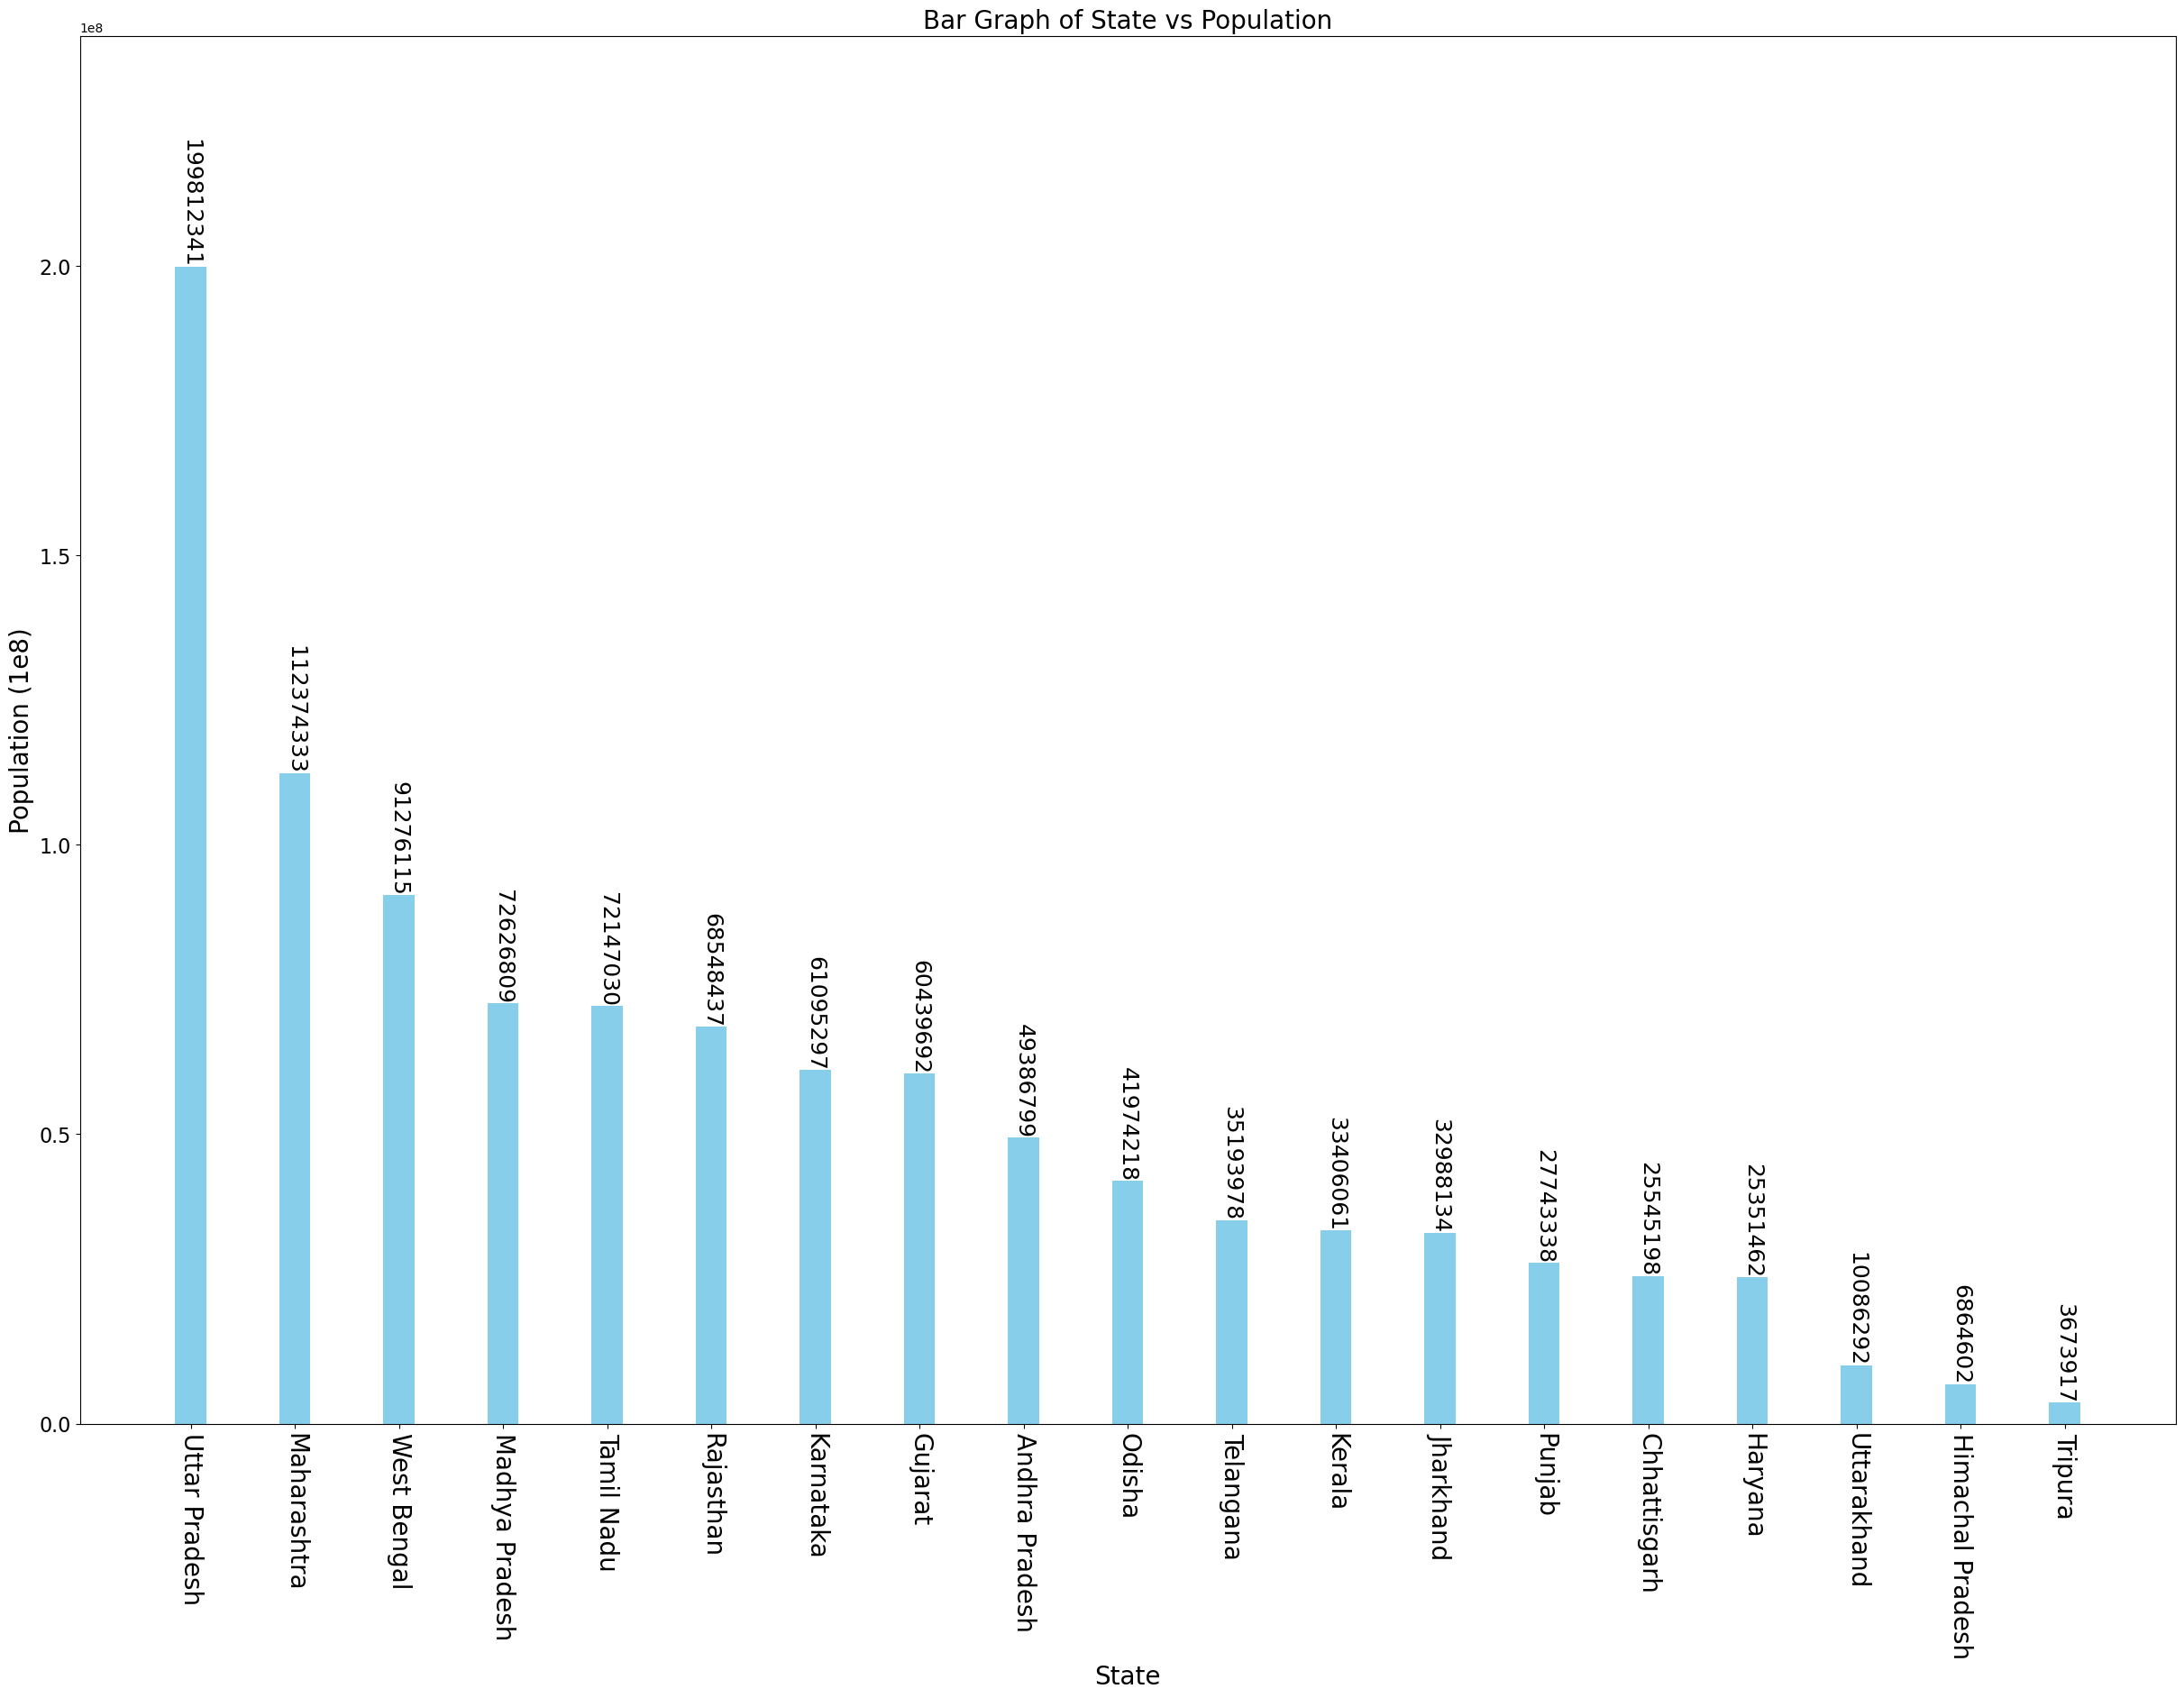

In [27]:
positions = np.arange(len(sf)) * 2
plt.figure(figsize=(30,20))  # Adjust the figure size as needed
bars = plt.bar(positions, sf['Population'], color='skyblue', width=0.6)
#bars = plt.bar(df['State'], df['Population'], color='skyblue')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation = -90, fontsize = 18)

plt.xlabel('State', fontsize = 20)  # Label for the x-axis
plt.ylabel('Population (1e8)', fontsize = 20)  # Label for the y-axis
plt.title('Bar Graph of State vs Population', fontsize = 20)  # Title of the graph
plt.ylim(0, max(sf['Population']) * 1.2)  # Adjust y-axis limits for better visibility
plt.xticks(positions, sf['State'], rotation = -90, fontsize = 20)
plt.yticks(fontsize=16)
plt.show()

## State vs Urban-Rural

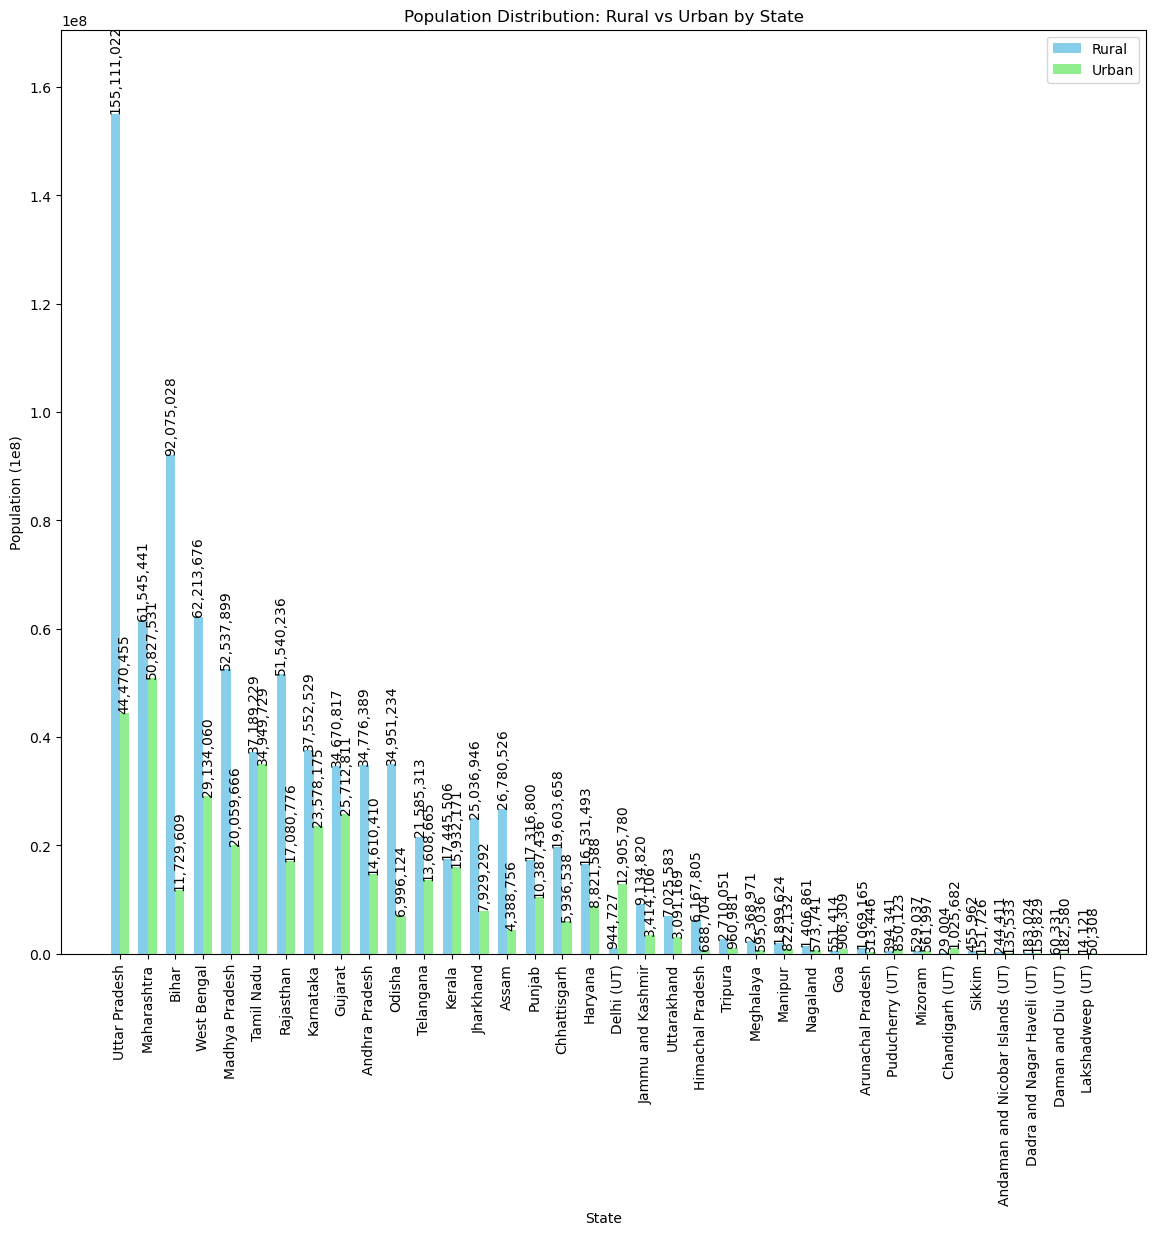

In [9]:

# Extract relevant columns
data = df[['State', 'Rural', 'Urban']]

# Define the positions for the bars with increased spacing
positions = np.arange(len(data)) * 3  # Increase the distance between bars by multiplying by 3

# Set the width of the bars
bar_width = 1

plt.figure(figsize=(14, 12))  # Adjust the figure size as needed

# Plotting the bars
bars_rural = plt.bar(positions, data['Rural'], width=bar_width, label='Rural', color='skyblue')
bars_urban = plt.bar(positions + bar_width, data['Urban'], width=bar_width, label='Urban', color='lightgreen')

# Adding data labels with vertical rotation for Rural bars
for bar in bars_rural:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', rotation=90)

# Adding data labels with vertical rotation for Urban bars
for bar in bars_urban:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', rotation=90)

plt.xlabel('State')  # Label for the x-axis
plt.ylabel('Population (1e8)')  # Label for the y-axis
plt.title('Population Distribution: Rural vs Urban by State')  # Title of the graph
plt.xticks(positions + bar_width / 2, data['State'], rotation=90)  # Rotate x-axis labels to vertical and set positions

# Adding legend
plt.legend()

# Adjust y-axis limits for better visibility
plt.ylim(0, max(data[['Rural', 'Urban']].max()) * 1.1)

plt.show()


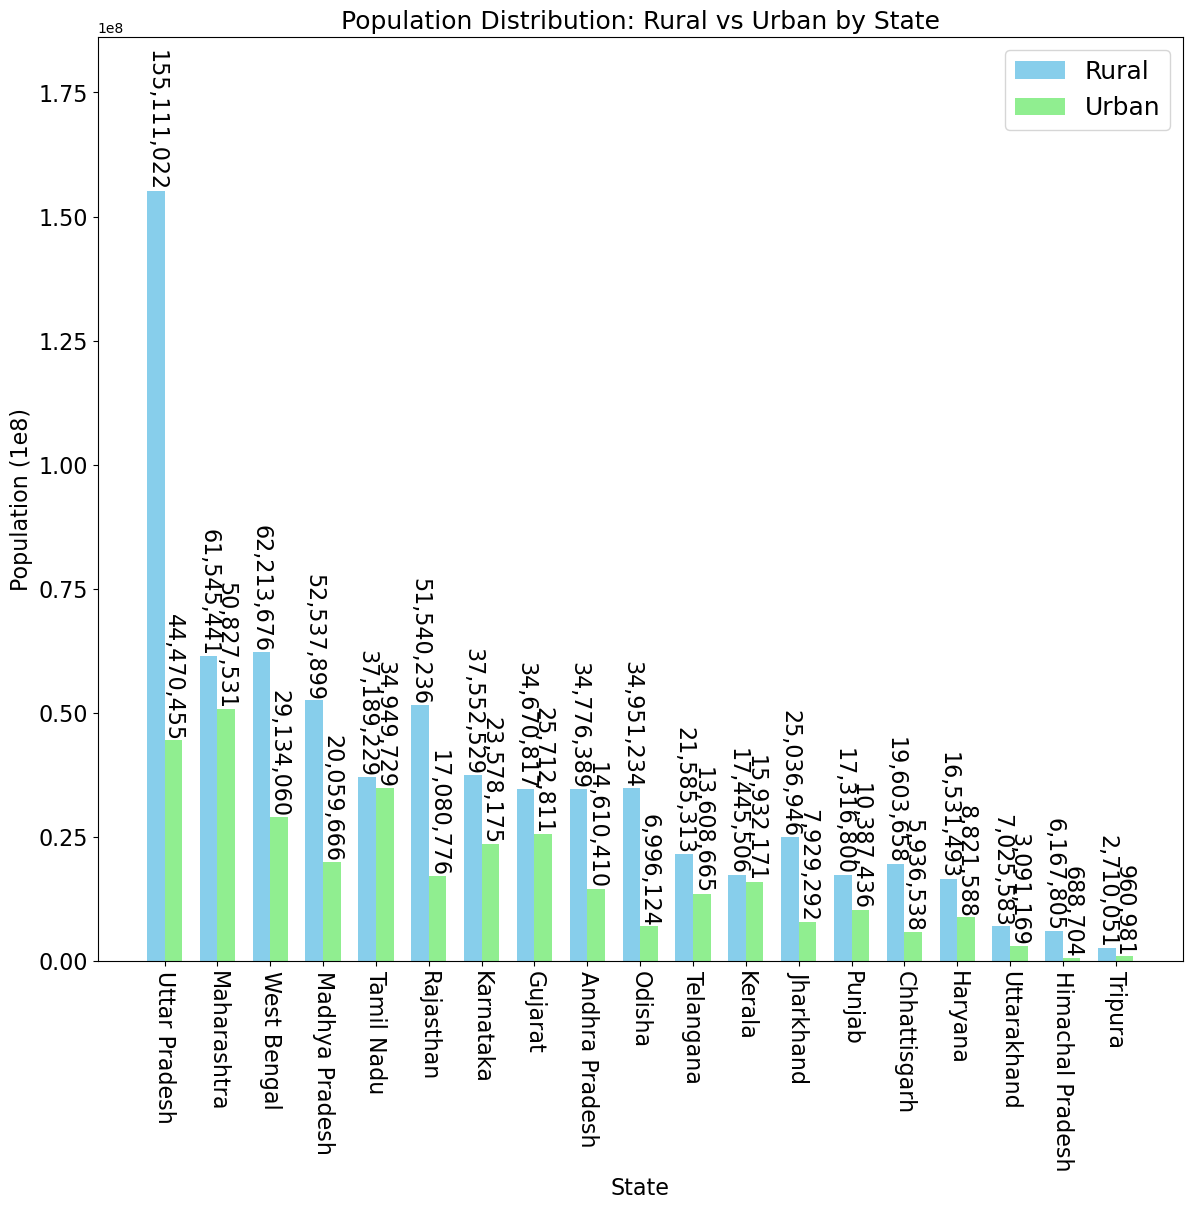

In [37]:

# Extract relevant columns
data = sf[['State', 'Rural', 'Urban']]

# Define the positions for the bars with increased spacing
positions = np.arange(len(data)) * 3  # Increase the distance between bars by multiplying by 3

# Set the width of the bars
bar_width = 1

plt.figure(figsize=(14, 12))  # Adjust the figure size as needed

# Plotting the bars
bars_rural = plt.bar(positions, data['Rural'], width=bar_width, label='Rural', color='skyblue')
bars_urban = plt.bar(positions + bar_width, data['Urban'], width=bar_width, label='Urban', color='lightgreen')

# Adding data labels with vertical rotation for Rural bars
for bar in bars_rural:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', rotation=-90, fontsize = 16)

# Adding data labels with vertical rotation for Urban bars
for bar in bars_urban:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', rotation=-90, fontsize = 16)

plt.xlabel('State', fontsize = 16)  # Label for the x-axis
plt.ylabel('Population (1e8)' ,fontsize = 16)  # Label for the y-axis
plt.title('Population Distribution: Rural vs Urban by State', fontsize = 18)  # Title of the graph
plt.xticks(positions + bar_width / 2, data['State'], rotation=-90, fontsize = 16)  # Rotate x-axis labels to vertical and set positions

# Adding legend
plt.legend(fontsize = 18)
plt.yticks(fontsize=16)
# Adjust y-axis limits for better visibility
plt.ylim(0, max(data[['Rural', 'Urban']].max()) * 1.1)
plt.ylim(0, max(max(sf['Rural']), max(sf['Urban'])) * 1.2)

plt.show()


## State vs Density

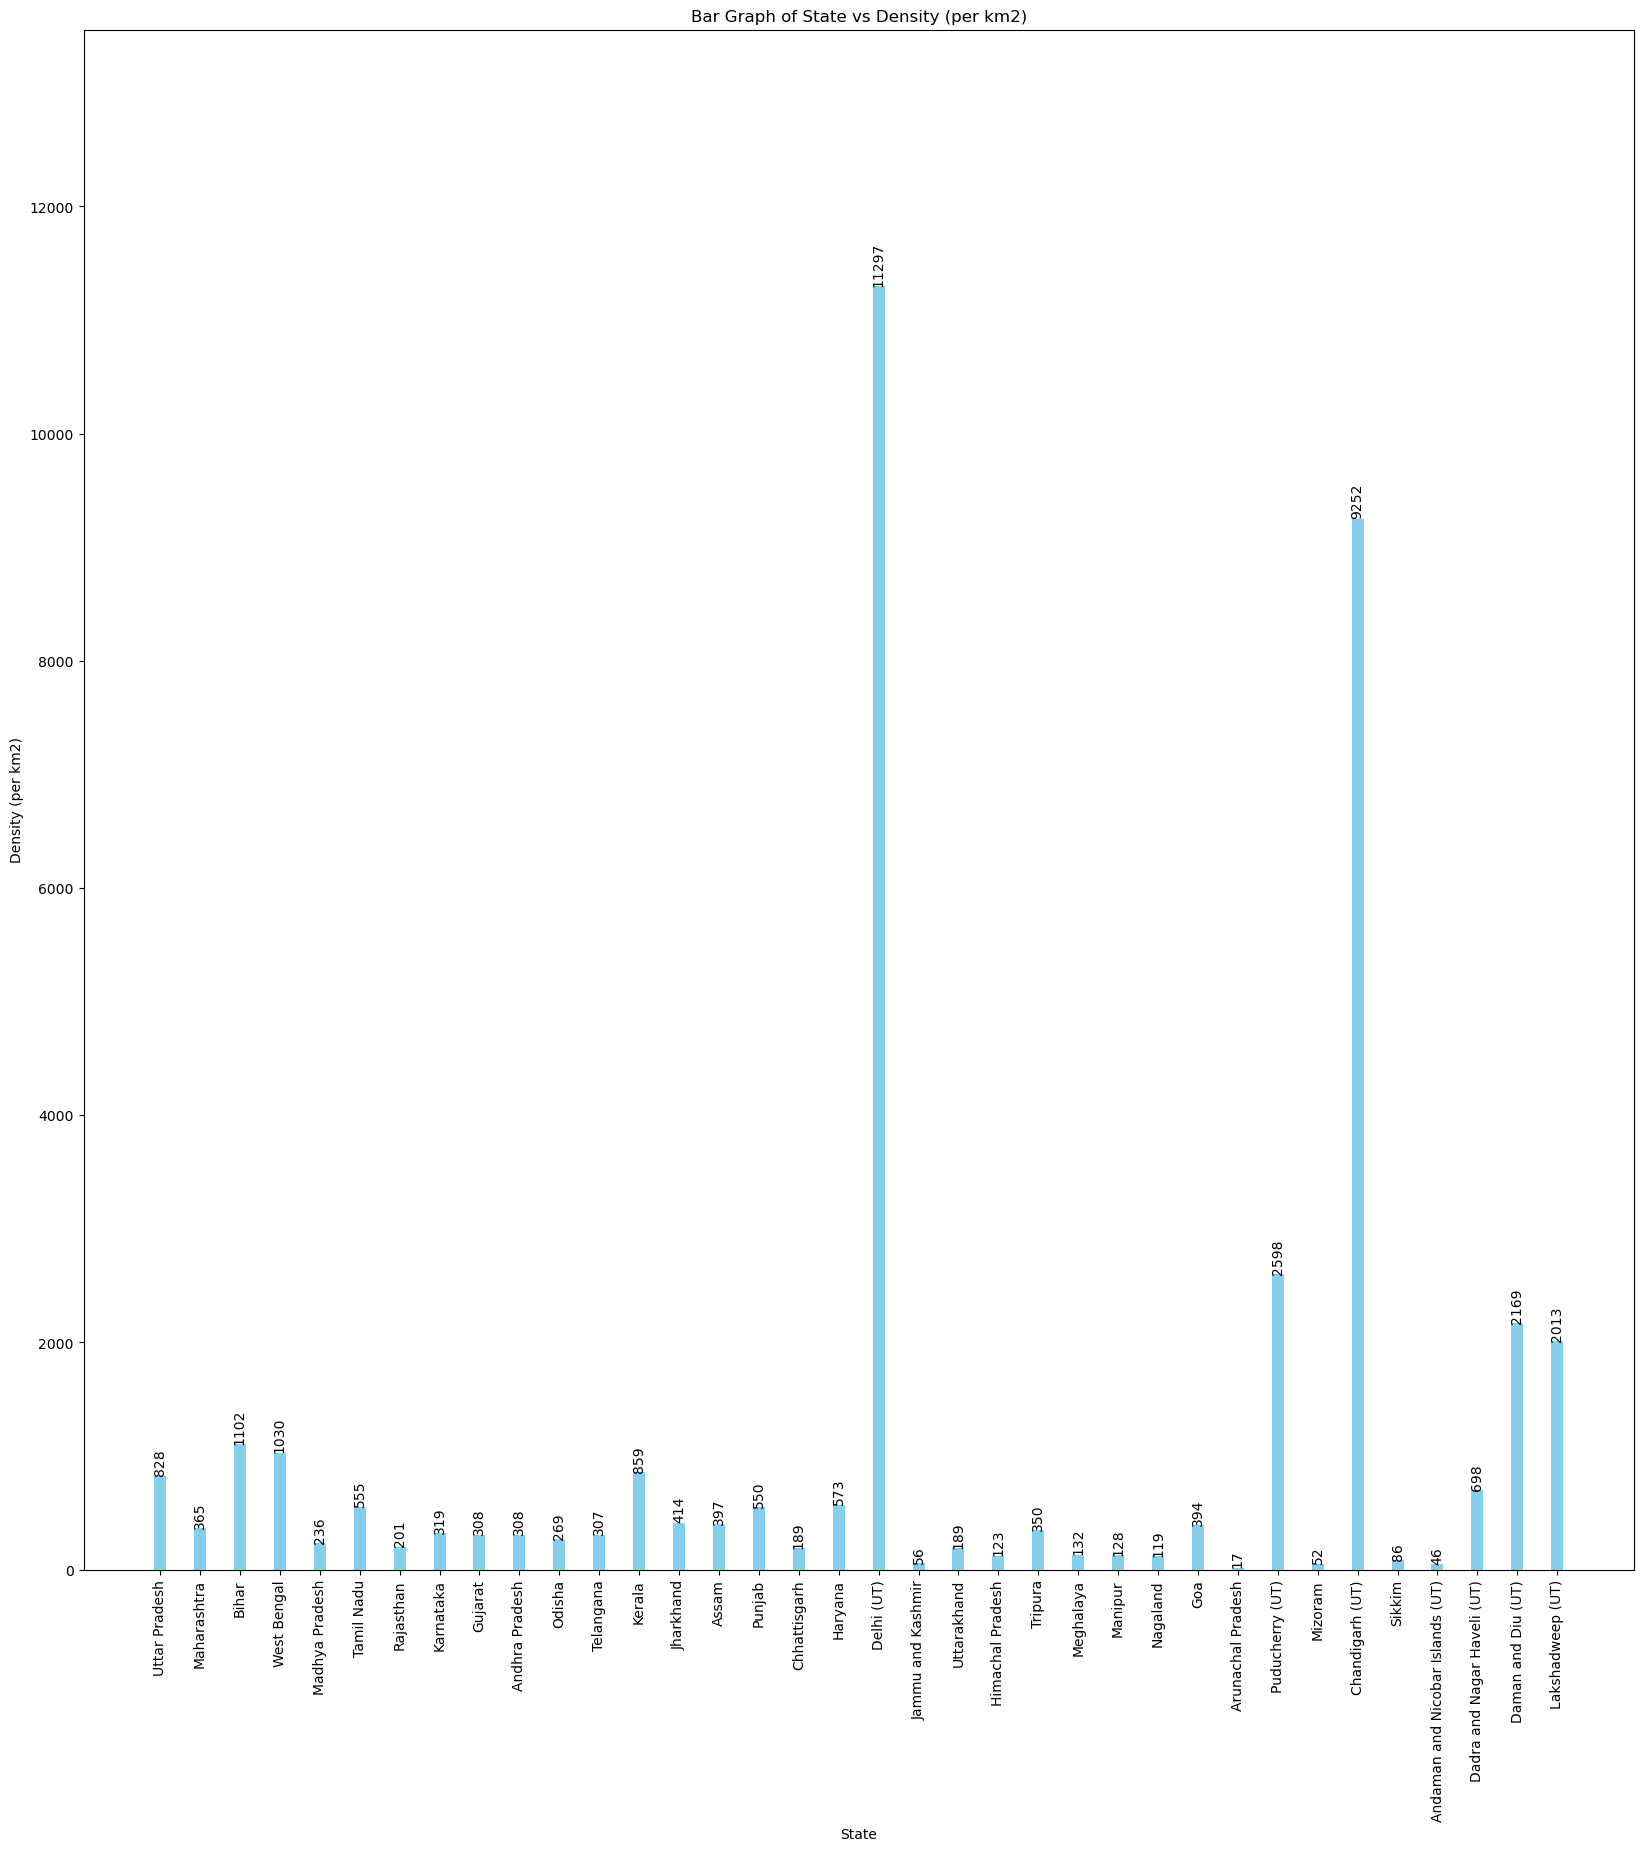

In [11]:
positions = np.arange(len(df)) * 2
plt.figure(figsize=(20,20))  # Adjust the figure size as needed
bars = plt.bar(positions, df['Density (per km2)'], color='skyblue', width=0.6)
#bars = plt.bar(df['State'], df['Population'], color='skyblue')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation = 90)

plt.xlabel('State')  # Label for the x-axis
plt.ylabel('Density (per km2)')  # Label for the y-axis
plt.title('Bar Graph of State vs Density (per km2)')  # Title of the graph
plt.ylim(0, max(df['Density (per km2)']) * 1.2)  # Adjust y-axis limits for better visibility
plt.xticks(positions, df['State'], rotation=90)
plt.show()

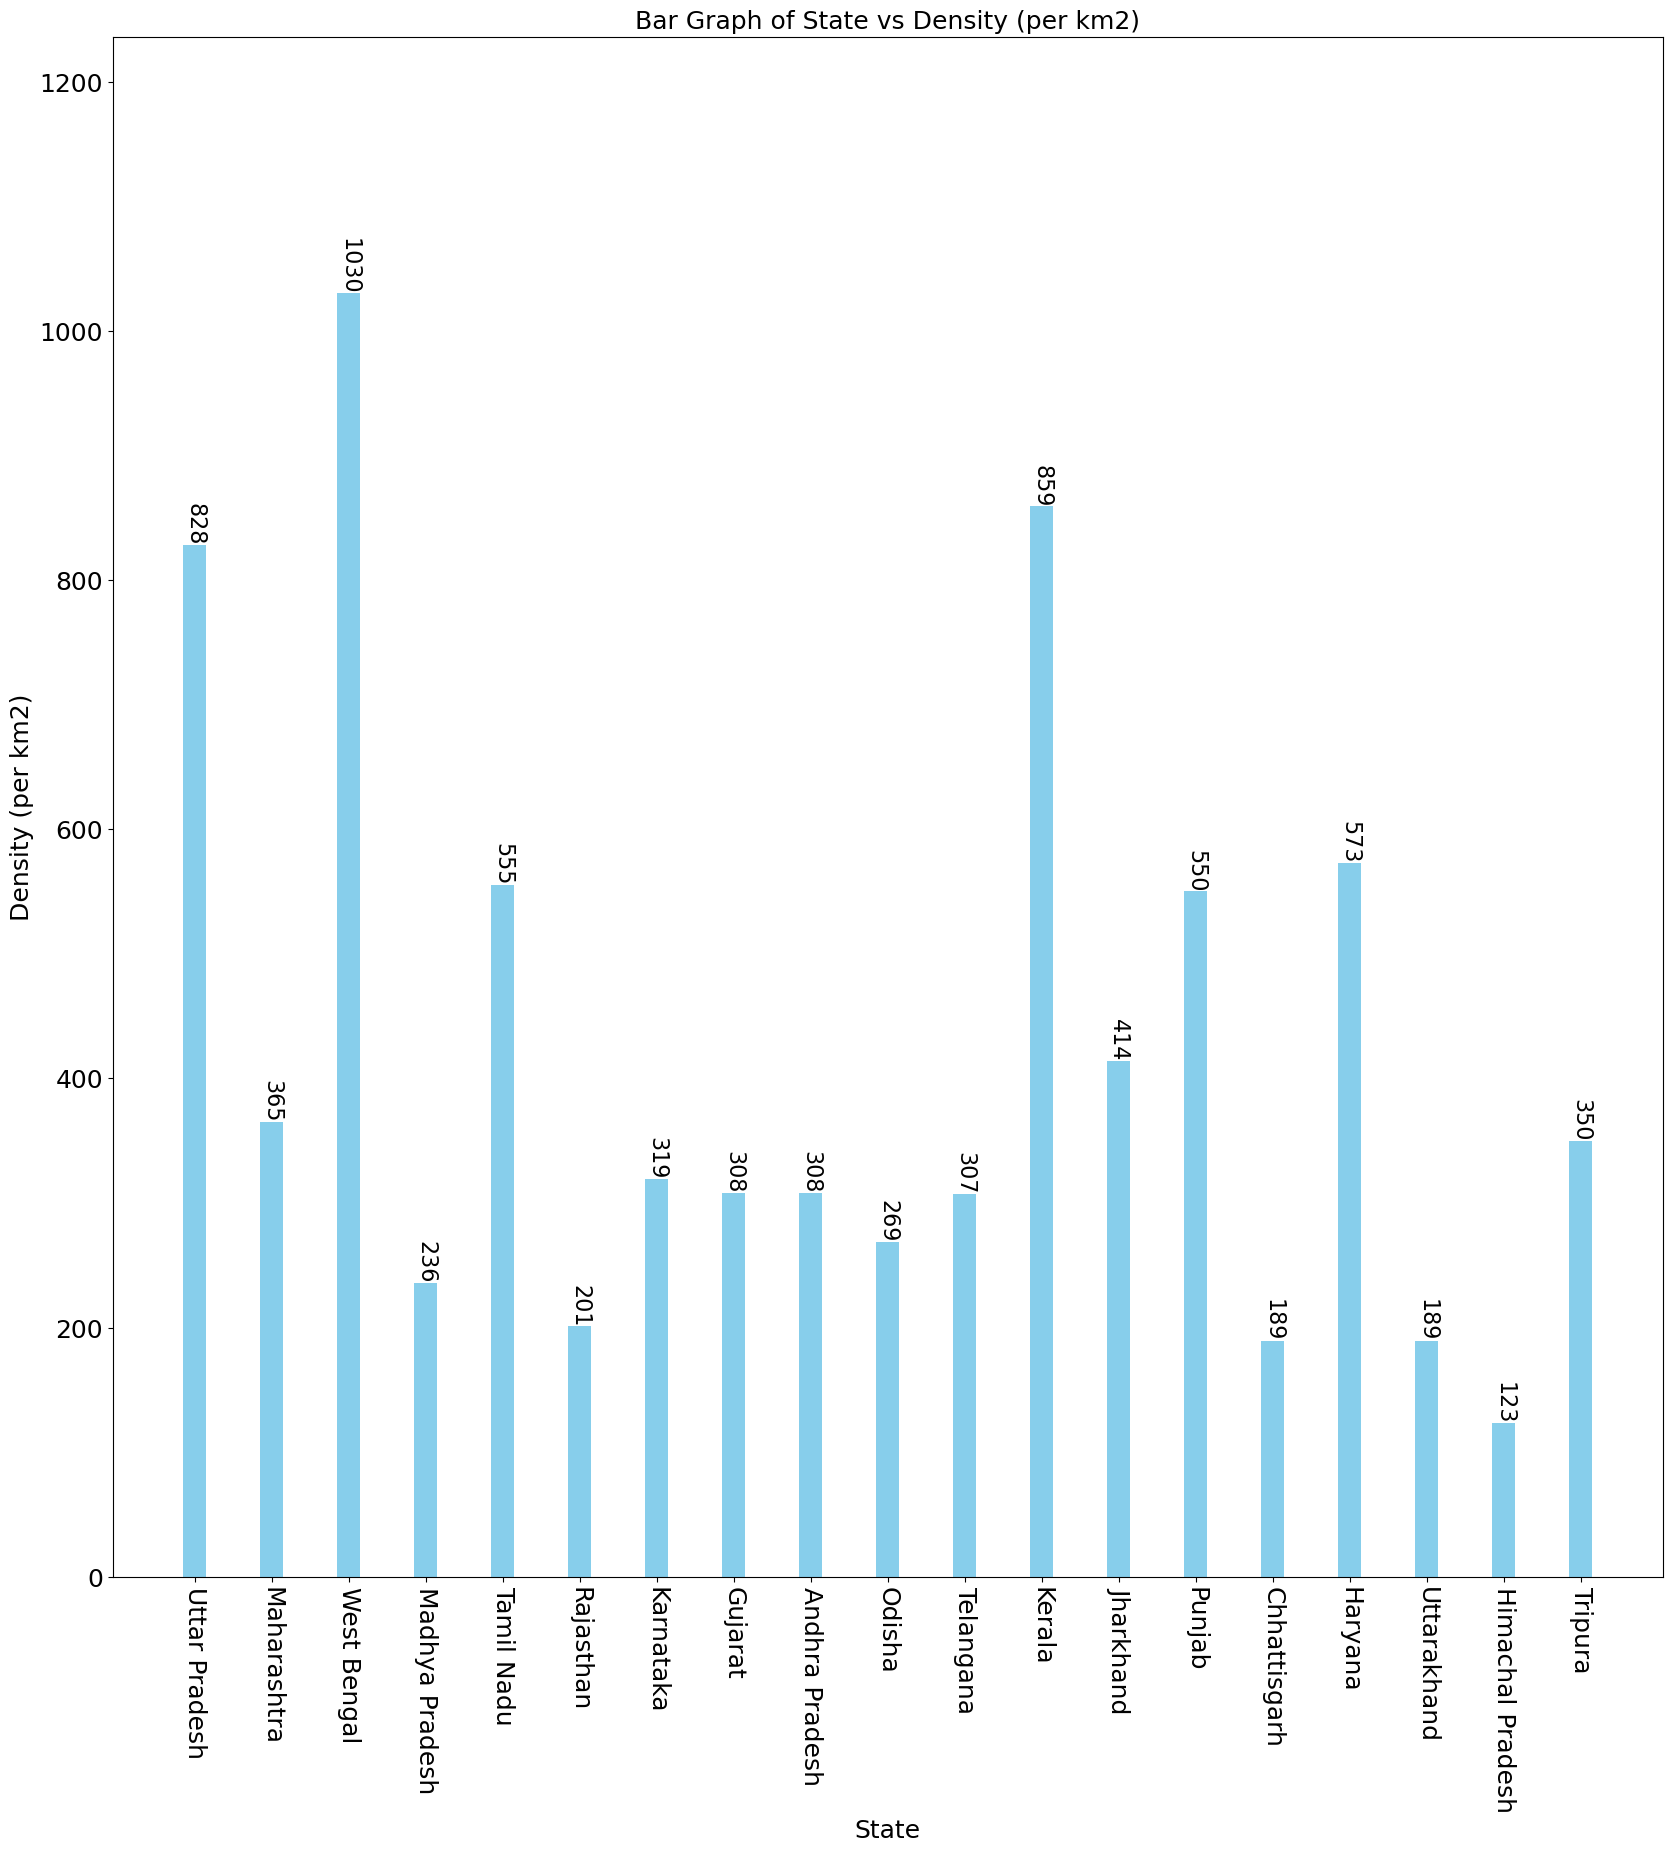

In [41]:
positions = np.arange(len(sf)) * 2
plt.figure(figsize=(20,20))  # Adjust the figure size as needed
bars = plt.bar(positions, sf['Density (per km2)'], color='skyblue', width=0.6)
#bars = plt.bar(df['State'], df['Population'], color='skyblue')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation = -90, fontsize = 16)

plt.xlabel('State', fontsize = 18)  # Label for the x-axis
plt.ylabel('Density (per km2)', fontsize = 18)  # Label for the y-axis
plt.title('Bar Graph of State vs Density (per km2)', fontsize = 18)  # Title of the graph
plt.ylim(0, max(sf['Density (per km2)']) * 1.2)  # Adjust y-axis limits for better visibility
plt.xticks(positions, sf['State'], rotation=-90, fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

## State vs Solar Area-Solar Count

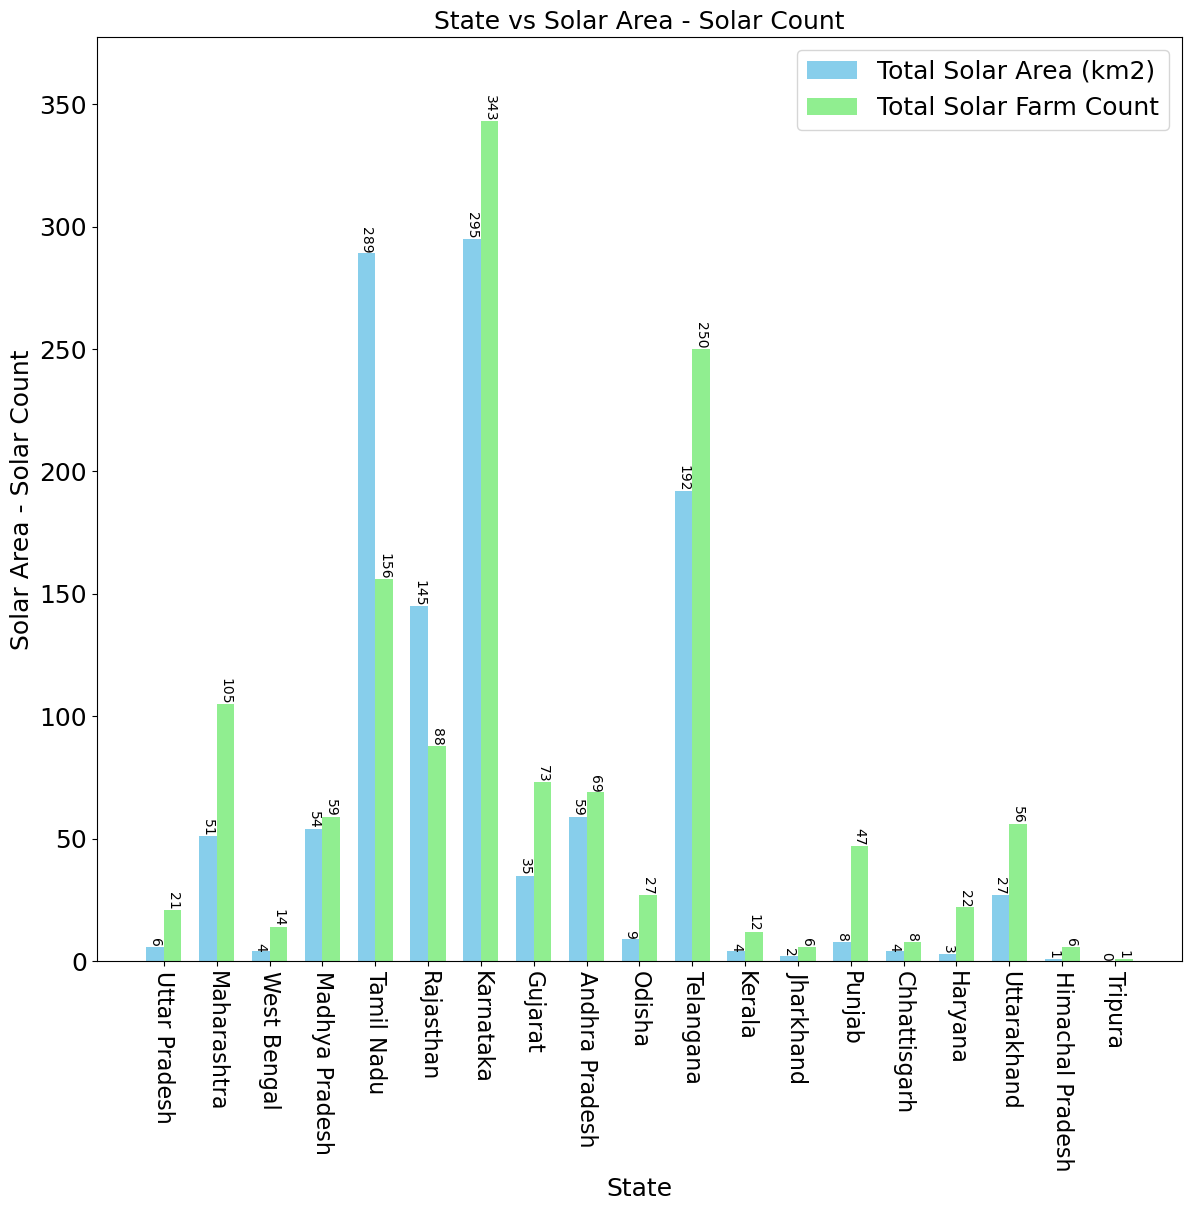

In [45]:

# Extract relevant columns
data = sf[['State', 'Total Solar Area (km2)', 'Total Solar Farm Count']]

# Define the positions for the bars with increased spacing
positions = np.arange(len(data)) * 3  # Increase the distance between bars by multiplying by 3

# Set the width of the bars
bar_width = 1

plt.figure(figsize=(14, 12))  # Adjust the figure size as needed

# Plotting the bars
bars_rural = plt.bar(positions, data['Total Solar Area (km2)'], width=bar_width, label='Total Solar Area (km2)', color='skyblue')
bars_urban = plt.bar(positions + bar_width, data['Total Solar Farm Count'], width=bar_width, label='Total Solar Farm Count', color='lightgreen')

# Adding data labels with vertical rotation for Rural bars
for bar in bars_rural:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', rotation=-90)

# Adding data labels with vertical rotation for Urban bars
for bar in bars_urban:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', rotation=-90)

plt.xlabel('State', fontsize = 18)  # Label for the x-axis
plt.ylabel('Solar Area - Solar Count', fontsize = 18)  # Label for the y-axis
plt.title('State vs Solar Area - Solar Count', fontsize = 18)  # Title of the graph
plt.xticks(positions + bar_width / 2, data['State'], rotation=-90, fontsize = 16)  # Rotate x-axis labels to vertical and set positions
plt.yticks(fontsize = 18)
# Adding legend
plt.legend(fontsize = 18)

# Adjust y-axis limits for better visibility
plt.ylim(0, max(data[['Total Solar Area (km2)', 'Total Solar Farm Count']].max()) * 1.1)

plt.show()


## Area Percent


In [14]:
df['Area Percentage'] = df['Total Solar Farm Count'] / df['Total Solar Area (km2)']
sf['Area Percentage'] = sf['Total Solar Farm Count'] / sf['Total Solar Area (km2)']


C:\temp\ipykernel_25592\1415346245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf['Area Percentage'] = sf['Total Solar Farm Count'] / sf['Total Solar Area (km2)']


In [15]:
sf.tail()

,Sl No,State,Population,Rural,Urban,Area,Density (per km2),Total Solar Area (km2),Total Solar Farm Count,Percentage,Area Percentage
16,17,Chhattisgarh,25545198,19603658,5936538,135191,189,4.0,8.0,3.131704e-07,2.000000
17,18,Haryana,25351462,16531493,8821588,44212,573,3.0,22.0,8.678001e-07,7.333333
20,21,Uttarakhand,10086292,7025583,3091169,53483,189,27.0,56.0,5.552090e-06,2.074074
21,22,Himachal Pradesh,6864602,6167805,688704,55673,123,1.0,6.0,8.740492e-07,6.000000
22,23,Tripura,3673917,2710051,960981,10486,350,0.0,1.0,2.721891e-07,inf


In [16]:
df.to_csv(r"C:\Users\Harsh mishra\Desktop\solarFarm\data\solar+population.csv", index = False)

In [17]:
sf_sorted = sf.sort_values(by='Area Percentage')

In [18]:
sf_sorted.replace([np.inf, -np.inf], np.nan, inplace=True)

In [19]:
sf_cleaned = sf_sorted.dropna()

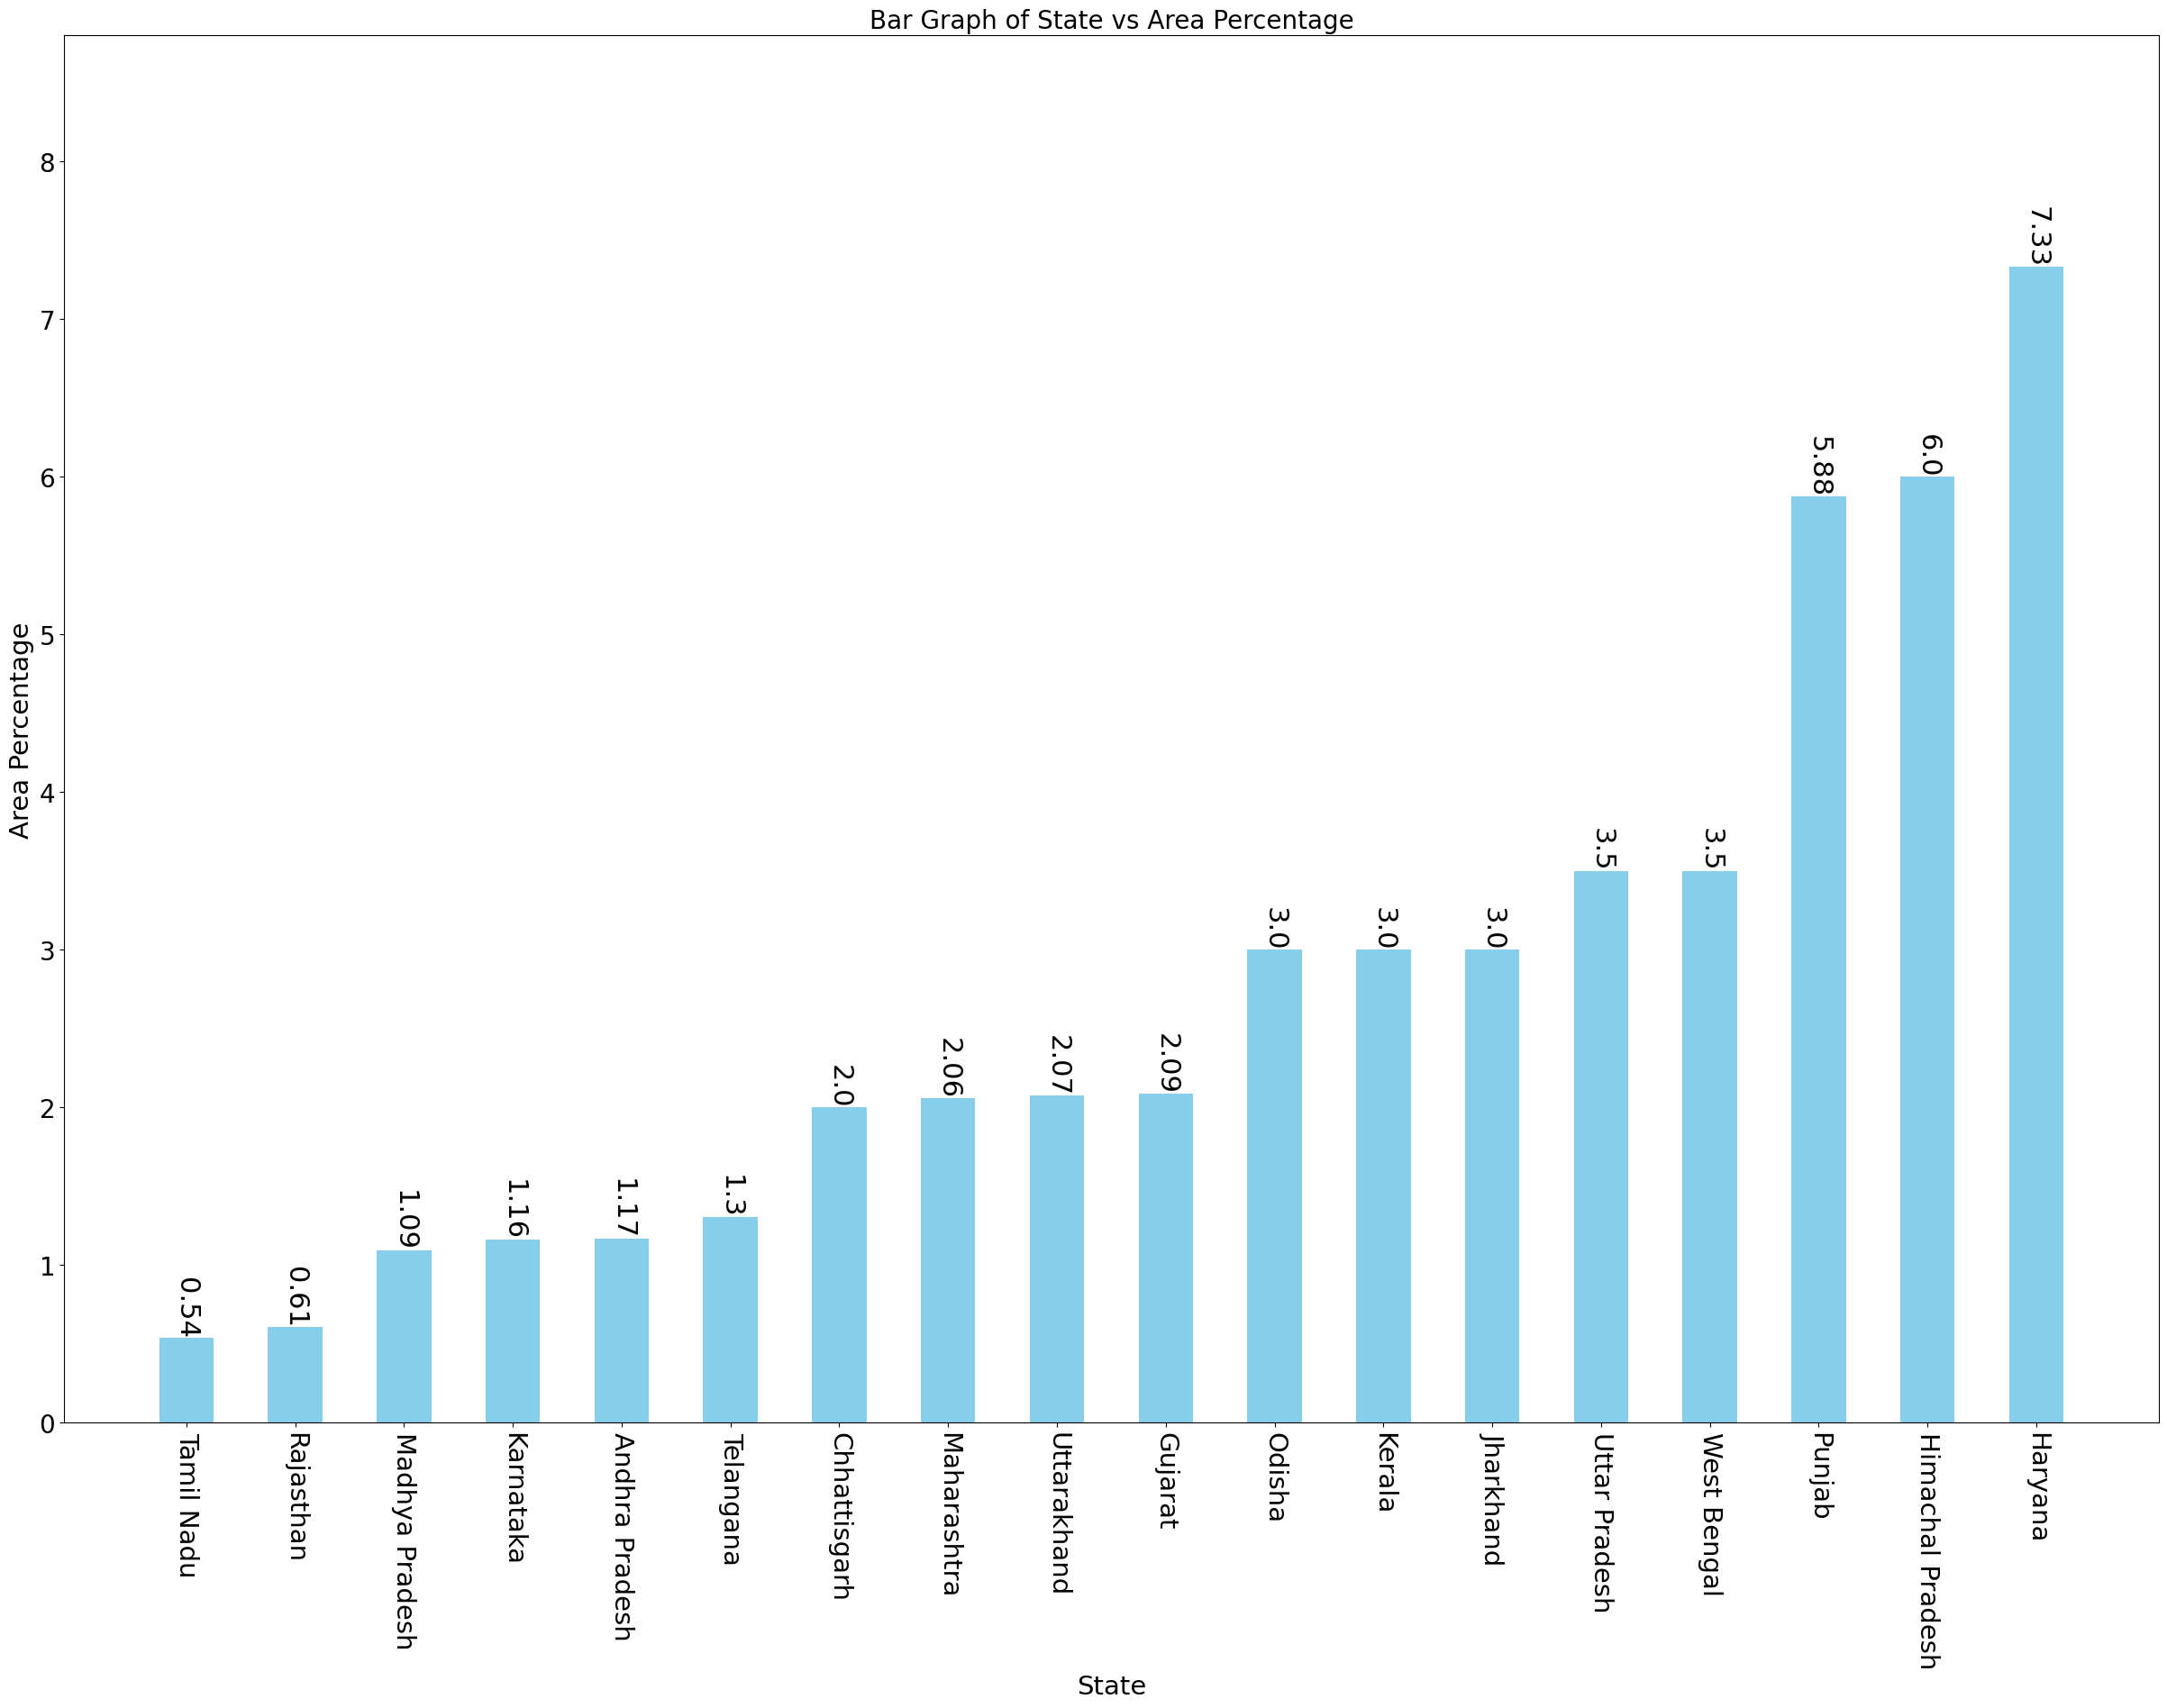

In [52]:
positions = np.arange(len(sf_cleaned)) * 2
plt.figure(figsize=(30,20))  # Adjust the figure size as needed
bars = plt.bar(positions, sf_cleaned['Area Percentage'], color='skyblue', width=1)
#bars = plt.bar(df['State'], df['Population'], color='skyblue')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation = -90, fontsize = 22)

plt.xlabel('State', fontsize = 21)  # Label for the x-axis
plt.ylabel('Area Percentage', fontsize = 21)  # Label for the y-axis
plt.title('Bar Graph of State vs Area Percentage', fontsize = 20)  # Title of the graph
plt.ylim(0, max(sf_cleaned['Area Percentage']) * 1.2)  # Adjust y-axis limits for better visibility
plt.xticks(positions, sf_cleaned['State'], rotation=-90, fontsize = 21)
plt.yticks(fontsize = 20)
plt.show()

In [21]:
sf_sorted.to_csv(r"C:\Users\Harsh mishra\Desktop\solarFarm\data\Only solar+population.csv", index = False)